In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np

In [99]:
all_data = pd.read_csv("agri_output_data.csv")

In [100]:
all_data.head()

,Variable,Year,ABARES region,Value,RSE,Unnamed: 5,Unnamed: 6
0,AI stud fees and herd testing ($),1990,NSW Central West,90.0,68.0,NaN,NaN
1,Accounting services ($),1990,NSW Central West,2320.0,19.0,NaN,NaN
2,Advisory services ($),1990,NSW Central West,120.0,80.0,NaN,NaN
3,Age of owner manager (yrs),1990,NSW Central West,57.0,5.0,NaN,NaN
4,Age of spouse (yrs),1990,NSW Central West,51.0,4.0,NaN,NaN


In [101]:
all_data['Region'] = all_data['ABARES region'].str[:2]
all_data

,Variable,Year,ABARES region,Value,RSE,Unnamed: 5,Unnamed: 6,Region
0,AI stud fees and herd testing ($),1990,NSW Central West,90.0,68.0,NaN,NaN,NS
1,Accounting services ($),1990,NSW Central West,2320.0,19.0,NaN,NaN,NS
2,Advisory services ($),1990,NSW Central West,120.0,80.0,NaN,NaN,NS
3,Age of owner manager (yrs),1990,NSW Central West,57.0,5.0,NaN,NaN,NS
4,Age of spouse (yrs),1990,NSW Central West,51.0,4.0,NaN,NaN,NS
...,...,...,...,...,...,...,...,...
142795,Wheat receipts ($),2022,WA The Kimberley,0.0,NaN,NaN,NaN,WA
142796,Wheat sold (t),2022,WA The Kimberley,0.0,NaN,NaN,NaN,WA
142797,Wool cut per head (kg),2022,WA The Kimberley,NaN,NaN,NaN,NaN,WA
142798,Wool produced (kg),2022,WA The Kimberley,0.0,NaN,NaN,NaN,WA


In [102]:
all_data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Variable', 'Year', 'ABARES region', 'Value', 'RSE', 'Unnamed: 5',
       'Unnamed: 6', 'Region'],
      dtype='object')>

In [103]:
all_data = all_data[["Variable", "Year", "Region", "ABARES region", "Value"]]

In [104]:
all_data.head()

,Variable,Year,Region,ABARES region,Value
0,AI stud fees and herd testing ($),1990,NS,NSW Central West,90.0
1,Accounting services ($),1990,NS,NSW Central West,2320.0
2,Advisory services ($),1990,NS,NSW Central West,120.0
3,Age of owner manager (yrs),1990,NS,NSW Central West,57.0
4,Age of spouse (yrs),1990,NS,NSW Central West,51.0


In [106]:
all_data.rename(columns={"ABARES region": "Subregion"}, inplace=False)
all_data.head()

,Variable,Year,Region,Subregion,Value
0,AI stud fees and herd testing ($),1990,NS,NSW Central West,90.0
1,Accounting services ($),1990,NS,NSW Central West,2320.0
2,Advisory services ($),1990,NS,NSW Central West,120.0
3,Age of owner manager (yrs),1990,NS,NSW Central West,57.0
4,Age of spouse (yrs),1990,NS,NSW Central West,51.0


In [107]:
qld_data = all_data.loc[all_data["Region"] == "QL"]
qld_data.head()

,Variable,Year,Region,Subregion,Value
952,AI stud fees and herd testing ($),1990,QL,QLD Cape York and the Gulf,0.0
953,Accounting services ($),1990,QL,QLD Cape York and the Gulf,2320.0
954,Advisory services ($),1990,QL,QLD Cape York and the Gulf,0.0
955,Age of owner manager (yrs),1990,QL,QLD Cape York and the Gulf,45.0
956,Age of spouse (yrs),1990,QL,QLD Cape York and the Gulf,44.0


In [108]:
qld_data.to_csv("QLD_agri_data.csv")

In [109]:
qld_data["Variable"].unique()

array(['AI stud fees and herd testing ($)', 'Accounting services ($)',
       'Advisory services ($)', 'Age of owner manager (yrs)',
       'Age of spouse (yrs)', 'Agistment ($)',
       'Area operated at 30 June (ha)', 'Barley area sown (ha)',
       'Barley produced (t)', 'Barley receipts ($)',
       'Beef bulls at 30 June (no.)', 'Beef calves at 30 June (no.)',
       'Beef cattle purchased ($)', 'Beef cattle purchased (no.)',
       'Beef cattle receipts ($)', 'Beef cattle sold (no.)',
       'Beef cattle transferred off farm (no.)',
       'Beef cattle transferred onto farm (no.)',
       'Beef cows at 30 June (no.)', 'Beef heifers at 30 June (no.)',
       'Beef herd at 30 June (no.)', 'Branding rate (%)',
       'Buildup in trading stocks ($)', 'Canola area sown (ha)',
       'Canola produced (t)', 'Canola receipts ($)',
       'Capital appreciation ($)', 'Capital at 1 July ($)',
       'Change in farm debt ($)', 'Contracts - cropping ($)',
       'Contracts - livestock ($)', '

In [110]:
herd_data = qld_data.loc[qld_data["Variable"] == "Beef herd at 30 June (no.)"].reset_index()
herd_data.head()

,index,Variable,Year,Region,Subregion,Value
0,972,Beef herd at 30 June (no.),1990,QL,QLD Cape York and the Gulf,3065.0
1,1108,Beef herd at 30 June (no.),1990,QL,QLD Central North,1360.0
2,1244,Beef herd at 30 June (no.),1990,QL,QLD Charleville - Longreach,762.0
3,1380,Beef herd at 30 June (no.),1990,QL,QLD Eastern Darling Downs,367.0
4,1516,Beef herd at 30 June (no.),1990,QL,QLD Northern Coastal - Mackay to Cairns,766.0


In [111]:
subregion_sizes = herd_data.groupby("Subregion").mean(numeric_only=True)
subregion_sizes

,index,Year,Value
Subregion,,,
QLD Cape York and the Gulf,70208.363636,2006.0,6777.454545
QLD Central North,70344.363636,2006.0,2566.606061
QLD Charleville - Longreach,70480.363636,2006.0,1278.969697
QLD Eastern Darling Downs,70616.363636,2006.0,228.181818
QLD Northern Coastal - Mackay to Cairns,70752.363636,2006.0,920.666667
QLD Southern Coastal - Curtis to Moreton,70888.363636,2006.0,561.484848
QLD West and South West,71024.363636,2006.0,2456.636364
QLD Western Downs and Central Highlands,71160.363636,2006.0,843.484848


In [138]:
herd_by_year = herd_data.groupby("Year").sum(numeric_only=True).reset_index()
herd_by_year

,Year,index,Value
0,1990,11584,9627.0
1,1991,43136,11779.0
2,1992,77952,10934.0
3,1993,112768,12298.0
4,1994,147584,11536.0
5,1995,182400,12000.0
6,1996,217216,12944.0
7,1997,252032,12952.0
8,1998,286848,14926.0
9,1999,321664,14641.0


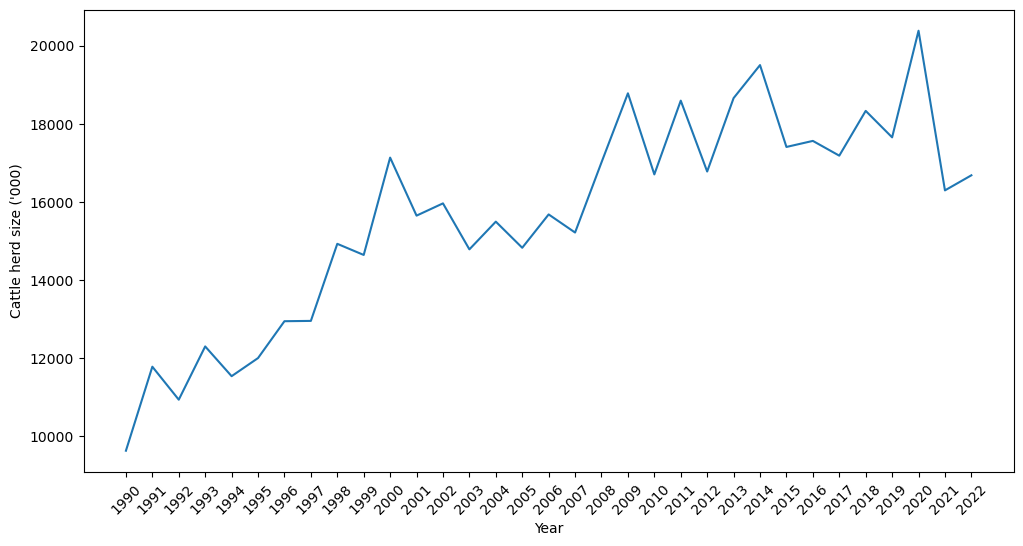

In [139]:
x_values = herd_by_year["Year"]
y_values = herd_by_year["Value"]
fig = plt.figure(figsize=(12,6))
plt.plot(x_values, y_values)
# plt.grid()
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("Cattle herd size ('000)")
plt.show()

The cattle herd numbers are inflated. The values are unadjusted (by us) farm census figures. There must be and adjustment that's made by ABS that we don't know about. The trends appear to macth government reports though